<a href="https://colab.research.google.com/github/Hami-611/21Days_AI-ML_Challenge/blob/main/Day_16_Intelligent_Document_Automation_Building_a_Smart_OCR_Bot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Day_16 Task_Resume_Data_Extraction



In [1]:
# Install pdf reading packages
!python -m pip install -q PyMuPDF pdfplumber

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 1.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.1/24.1 MB 25.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 24.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 29.4 MB/s eta 0:00:00


## Import Libraries

In [2]:
import os
import io
import ast
import fitz
import json
import time
import pdfplumber
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm
from PIL import Image
from typing import List
from pydantic import BaseModel
from IPython.display import display
import google.generativeai as genai

In [6]:
!pip install --quiet kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"hamika","key":"c611182f306ae5ca1bd7ce6873cea9b6"}'}

In [7]:
# 2. Move token and set perms
import os
os.makedirs('/root/.kaggle', exist_ok=True)
!mv kaggle.json /root/.kaggle/
!chmod 600 /root/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d snehaanbhawal/resume-dataset --unzip -p /content/dataset

Dataset URL: https://www.kaggle.com/datasets/snehaanbhawal/resume-dataset
License(s): CC0-1.0
 93% 58.0M/62.5M [00:00<00:00, 607MB/s]
100% 62.5M/62.5M [00:00<00:00, 618MB/s]


In [9]:
# Inspect folder structure
import os
for root, dirs, files in os.walk('/content/dataset'):
    print(root, len(files), "files")
    if len(files) > 0:
        print(" Sample files:", files[:5])

/content/dataset 0 files
/content/dataset/Resume 1 files
 Sample files: ['Resume.csv']
/content/dataset/data 0 files
/content/dataset/data/data 0 files
/content/dataset/data/data/CONSULTANT 115 files
 Sample files: ['79570655.pdf', '20314980.pdf', '12526702.pdf', '22571461.pdf', '25694422.pdf']
/content/dataset/data/data/CONSTRUCTION 112 files
 Sample files: ['90032884.pdf', '12839152.pdf', '48549972.pdf', '22718826.pdf', '99433371.pdf']
/content/dataset/data/data/DIGITAL-MEDIA 96 files
 Sample files: ['23864858.pdf', '40883703.pdf', '11270462.pdf', '26341987.pdf', '81508860.pdf']
/content/dataset/data/data/BANKING 115 files
 Sample files: ['96493528.pdf', '11266906.pdf', '69243180.pdf', '27606527.pdf', '19176318.pdf']
/content/dataset/data/data/BUSINESS-DEVELOPMENT 120 files
 Sample files: ['39875803.pdf', '14241621.pdf', '27850777.pdf', '39237915.pdf', '17421910.pdf']
/content/dataset/data/data/HEALTHCARE 115 files
 Sample files: ['25451319.pdf', '27090089.pdf', '10568183.pdf', '2913

In [10]:
data_root = "/content/dataset/data/data/ENGINEERING"
files = sorted(os.listdir(data_root))
files_path = [os.path.join(data_root, f) for f in files]
print("Count:", len(files_path))

Count: 118


In [11]:
! cat /kaggle/input/resume-dataset/data/data/ENGINEERING/31677347.pdf

%PDF-1.4
1 0 obj
<<
/Title (��)
/Creator (�� w k h t m l t o p d f   0 . 1 2 . 4)
/Producer (�� Q t   4 . 8 . 7)
/CreationDate (D:20210808154840+05'30')
>>
endobj
3 0 obj
<<
/Type /ExtGState
/SA true
/SM 0.02
/ca 1.0
/CA 1.0
/AIS false
/SMask /None>>
endobj
4 0 obj
[/Pattern /DeviceRGB]
endobj
5 0 obj
<<
/Type /Page
/Parent 2 0 R
/Contents 7 0 R
/Resources 9 0 R
/Annots 10 0 R
/MediaBox [0 0 595 842]
>>
endobj
9 0 obj
<<
/ColorSpace <<
/PCSp 4 0 R
/CSp /DeviceRGB
/CSpg /DeviceGray
>>
/ExtGState <<
/GSa 3 0 R
>>
/Pattern <<
>>
/Font <<
/F6 6 0 R
>>
/XObject <<
>>
>>
endobj
10 0 obj
[ ]
endobj
7 0 obj
<<
/Length 8 0 R
/Filter /FlateDecode
>>
stream
�O��~���\�}��]���?�}J�����_v�r|�?�>��)�)���/W&��Y_��re)W�˕X��_�$�L>]���ŏй��A�OW�[7A�p{��,���C����Ha��|�+����A������}<]�/>A��۫��S���o���&�3-|�Y�b��n����r�ܓ^�^ҿ�O�����O�s?�6����"��Oѣ���^��/�&��Q���nÐAWa���1�e����A�{�.0��r0��.t��c���G�
~�%)�C�r׊���e�ZV�Ֆ�wbY?�eU���n�zYV�Ֆ�w^���U�>ʻ�l}���!Ax
�㴟�q���B�ɧm�n:8�ף�
d}d��ۚ

## Convert PDFs to Images

In [12]:
!pip install pdf2image

In [13]:
!apt-get update
!apt-get install -y poppler-utils

Get:1 http://security.ubuntu.com/ubuntu jammy-security InRelease [129 kB]
Hit:2 http://archive.ubuntu.com/ubuntu jammy InRelease
Get:3 https://cli.github.com/packages stable InRelease [3,917 B]
Get:4 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease [3,632 B]
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Get:6 https://r2u.stat.illinois.edu/ubuntu jammy InRelease [6,555 B]
Get:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease [128 kB]
Get:8 http://security.ubuntu.com/ubuntu jammy-security/restricted amd64 Packages [5,584 kB]
Hit:9 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Get:11 http://archive.ubuntu.com/ubuntu jammy-backports InRelease [127 kB]
Get:12 http://security.ubuntu.com/ubuntu jammy-security/universe amd64 Packages [1,274 kB]
Hit:13 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy In

In [15]:
from pdf2image import convert_from_path

pdf_folder = "/content/dataset/data/data/ENGINEERING"
image_output_dir = "/content/pdf_images"
os.makedirs(image_output_dir, exist_ok=True)

pdf_files = [f for f in os.listdir(pdf_folder) if f.lower().endswith(".pdf")]
# Select only the first 5 PDF files
pdf_files_subset = pdf_files[:1]

all_image_paths = []

for pdf_file in pdf_files_subset:
    pdf_path = os.path.join(pdf_folder, pdf_file)
    pages = convert_from_path(pdf_path, dpi=300)

    pdf_image_paths = []
    for i, page in enumerate(pages):
        img_name = f"{os.path.splitext(pdf_file)[0]}_page_{i+1}.png"
        img_path = os.path.join(image_output_dir, img_name)
        page.save(img_path, "PNG")
        pdf_image_paths.append(img_path)

    all_image_paths.append((pdf_file, pdf_image_paths))

print(f"Converted {len(pdf_files_subset)} PDFs to images. Sample images:", all_image_paths[0][1][:3])

Converted 1 PDFs to images. Sample images: ['/content/pdf_images/31677347_page_1.png', '/content/pdf_images/31677347_page_2.png']


Displaying first page of 31677347.pdf:


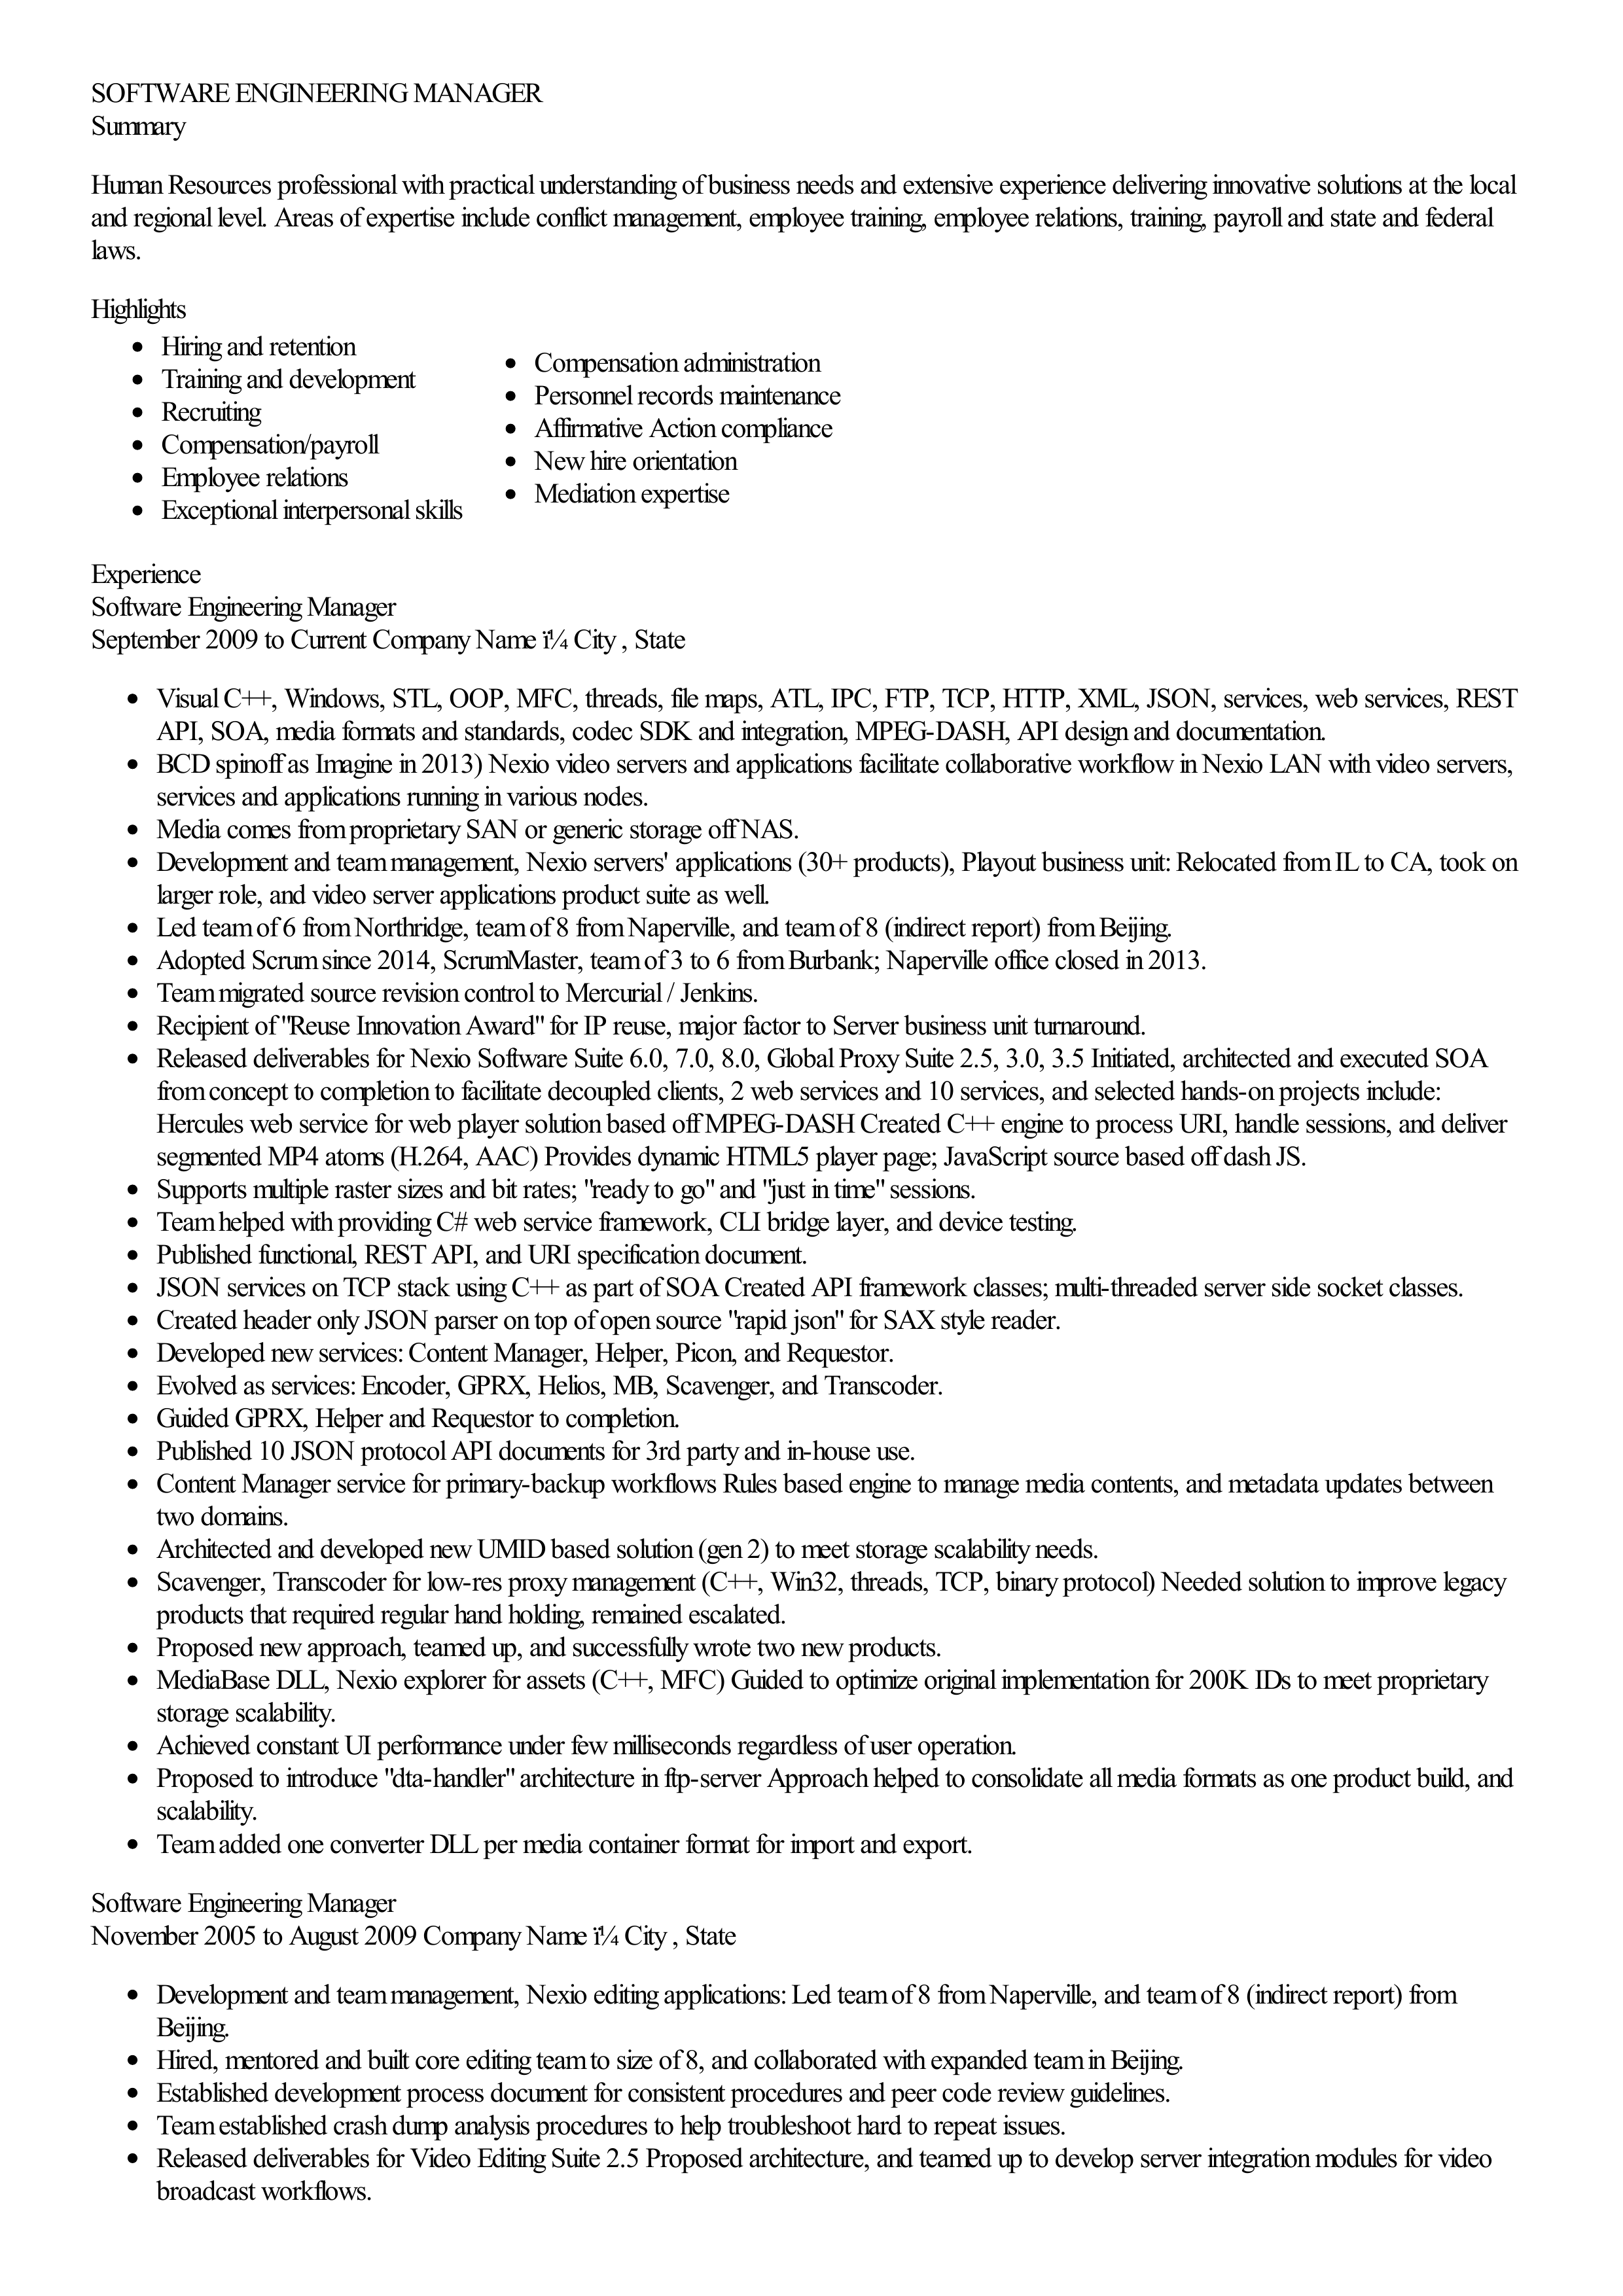

In [16]:
from IPython.display import display, Image as DisplayImage

# Display the first image from each converted PDF
for pdf_file, image_paths in all_image_paths:
    if image_paths:
        print(f"Displaying first page of {pdf_file}:")
        display(DisplayImage(image_paths[0]))
    else:
        print(f"No images found for {pdf_file}")

## GrayScale the Image

In [17]:
gray_image_paths = []

for pdf_file, image_paths in all_image_paths:
    pdf_gray_image_paths = []
    for img_path in image_paths:
        img = Image.open(img_path)
        gray_img = img.convert('L')
        gray_img_path = img_path.replace(".png", "_gray.png")
        gray_img.save(gray_img_path, "PNG")
        pdf_gray_image_paths.append(gray_img_path)
    gray_image_paths.append((pdf_file, pdf_gray_image_paths))

print(f"Converted {len(gray_image_paths)} PDFs to grayscale images. Sample images:", gray_image_paths[0][1][:3])

Converted 1 PDFs to grayscale images. Sample images: ['/content/pdf_images/31677347_page_1_gray.png', '/content/pdf_images/31677347_page_2_gray.png']


Displaying first grayscale page of 31677347.pdf:


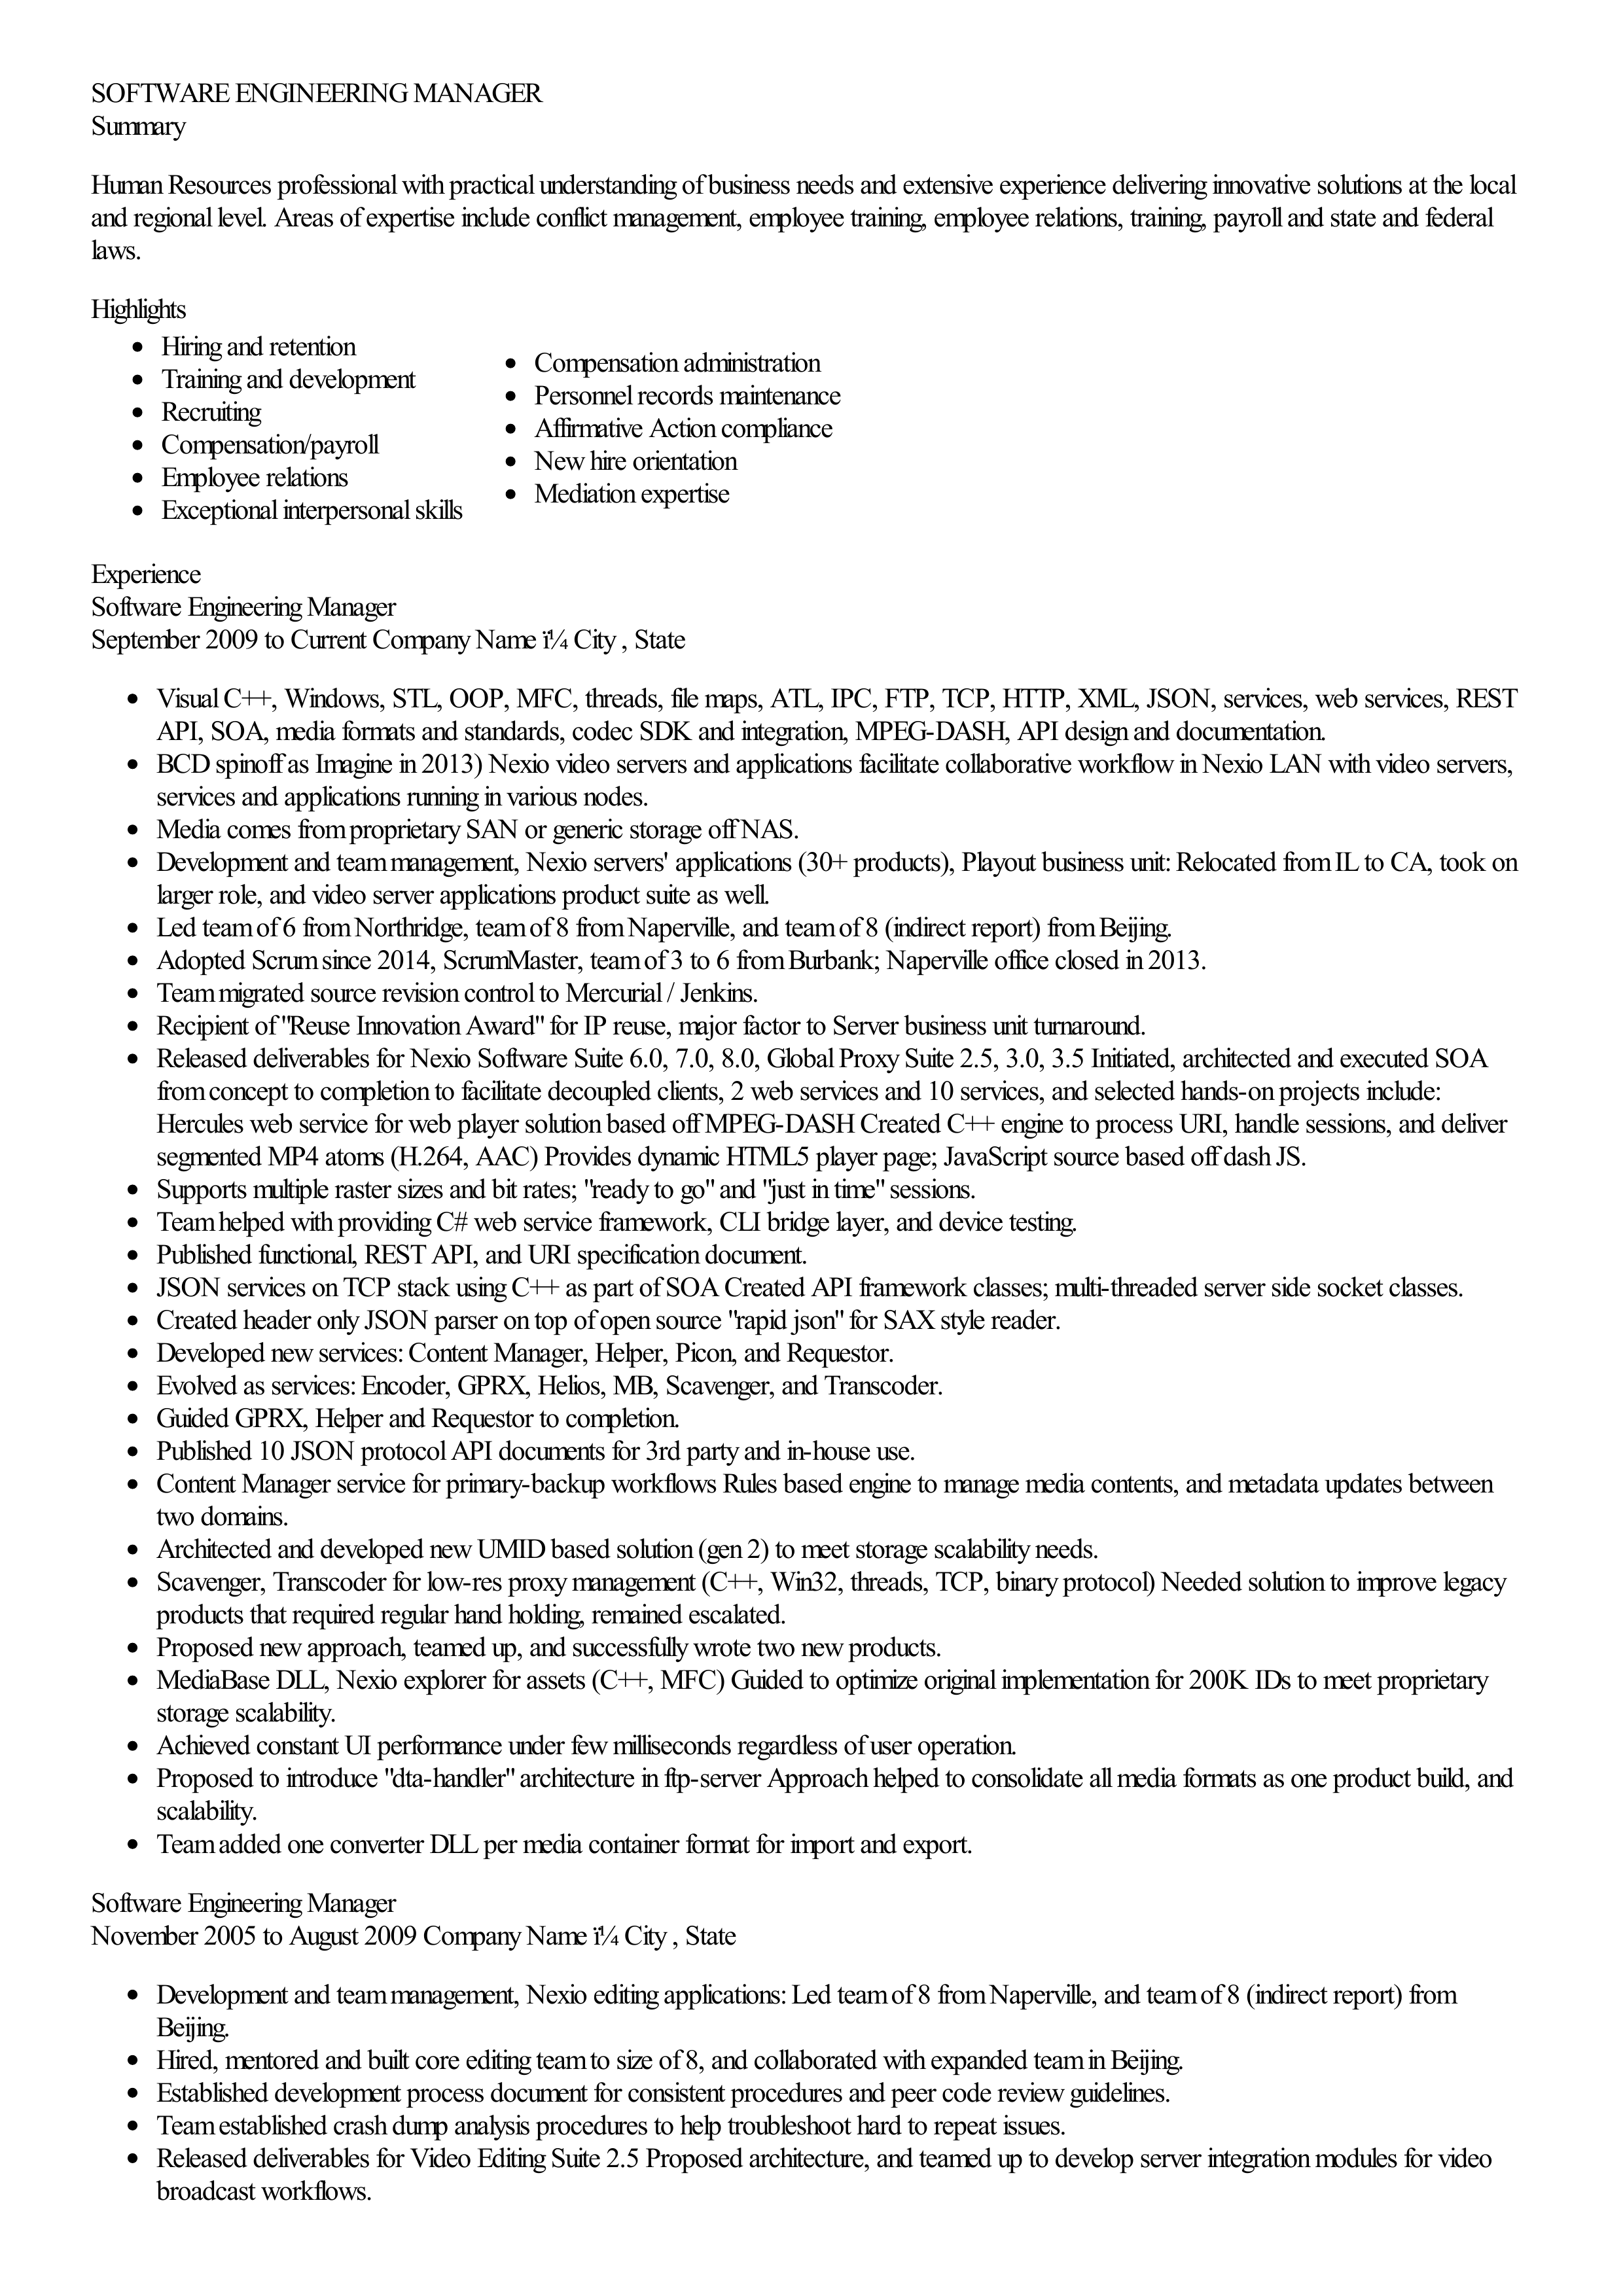

In [18]:
for pdf_file, image_paths in gray_image_paths:
    if image_paths:
        print(f"Displaying first grayscale page of {pdf_file}:")
        display(DisplayImage(image_paths[0]))
    else:
        print(f"No grayscale images found for {pdf_file}")

## Noise Reduction

In [19]:
from PIL import ImageFilter

denoised_image_paths = []

for pdf_file, gray_image_paths_list in gray_image_paths:
    pdf_denoised_image_paths = []
    for gray_img_path in gray_image_paths_list:
        img = Image.open(gray_img_path)
        # Apply a median filter for noise reduction
        denoised_img = img.filter(ImageFilter.MedianFilter(size=3))
        denoised_img_path = gray_img_path.replace("_gray.png", "_denoised.png")
        denoised_img.save(denoised_img_path, "PNG")
        pdf_denoised_image_paths.append(denoised_img_path)
    denoised_image_paths.append((pdf_file, pdf_denoised_image_paths))

print(f"Applied noise reduction to {len(denoised_image_paths)} PDFs. Sample images:", denoised_image_paths[0][1][:3])

Applied noise reduction to 1 PDFs. Sample images: ['/content/pdf_images/31677347_page_1_denoised.png', '/content/pdf_images/31677347_page_2_denoised.png']


In [20]:
import cv2

binarized_image_paths = []

for pdf_file, denoised_image_paths_list in denoised_image_paths:
    pdf_binarized_image_paths = []
    for denoised_img_path in denoised_image_paths_list:
        img = cv2.imread(denoised_img_path, cv2.IMREAD_GRAYSCALE)

        # Apply adaptive thresholding
        binarized_img = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY_INV, 11, 4)

        binarized_img_path = denoised_img_path.replace("_denoised.png", "_binarized.png")
        cv2.imwrite(binarized_img_path, binarized_img)
        pdf_binarized_image_paths.append(binarized_img_path)
    binarized_image_paths.append((pdf_file, pdf_binarized_image_paths))

print(f"Applied binarization to {len(binarized_image_paths)} PDFs. Sample images:", binarized_image_paths[0][1][:3])

Applied binarization to 1 PDFs. Sample images: ['/content/pdf_images/31677347_page_1_binarized.png', '/content/pdf_images/31677347_page_2_binarized.png']


Displaying first binarized page of 31677347.pdf:


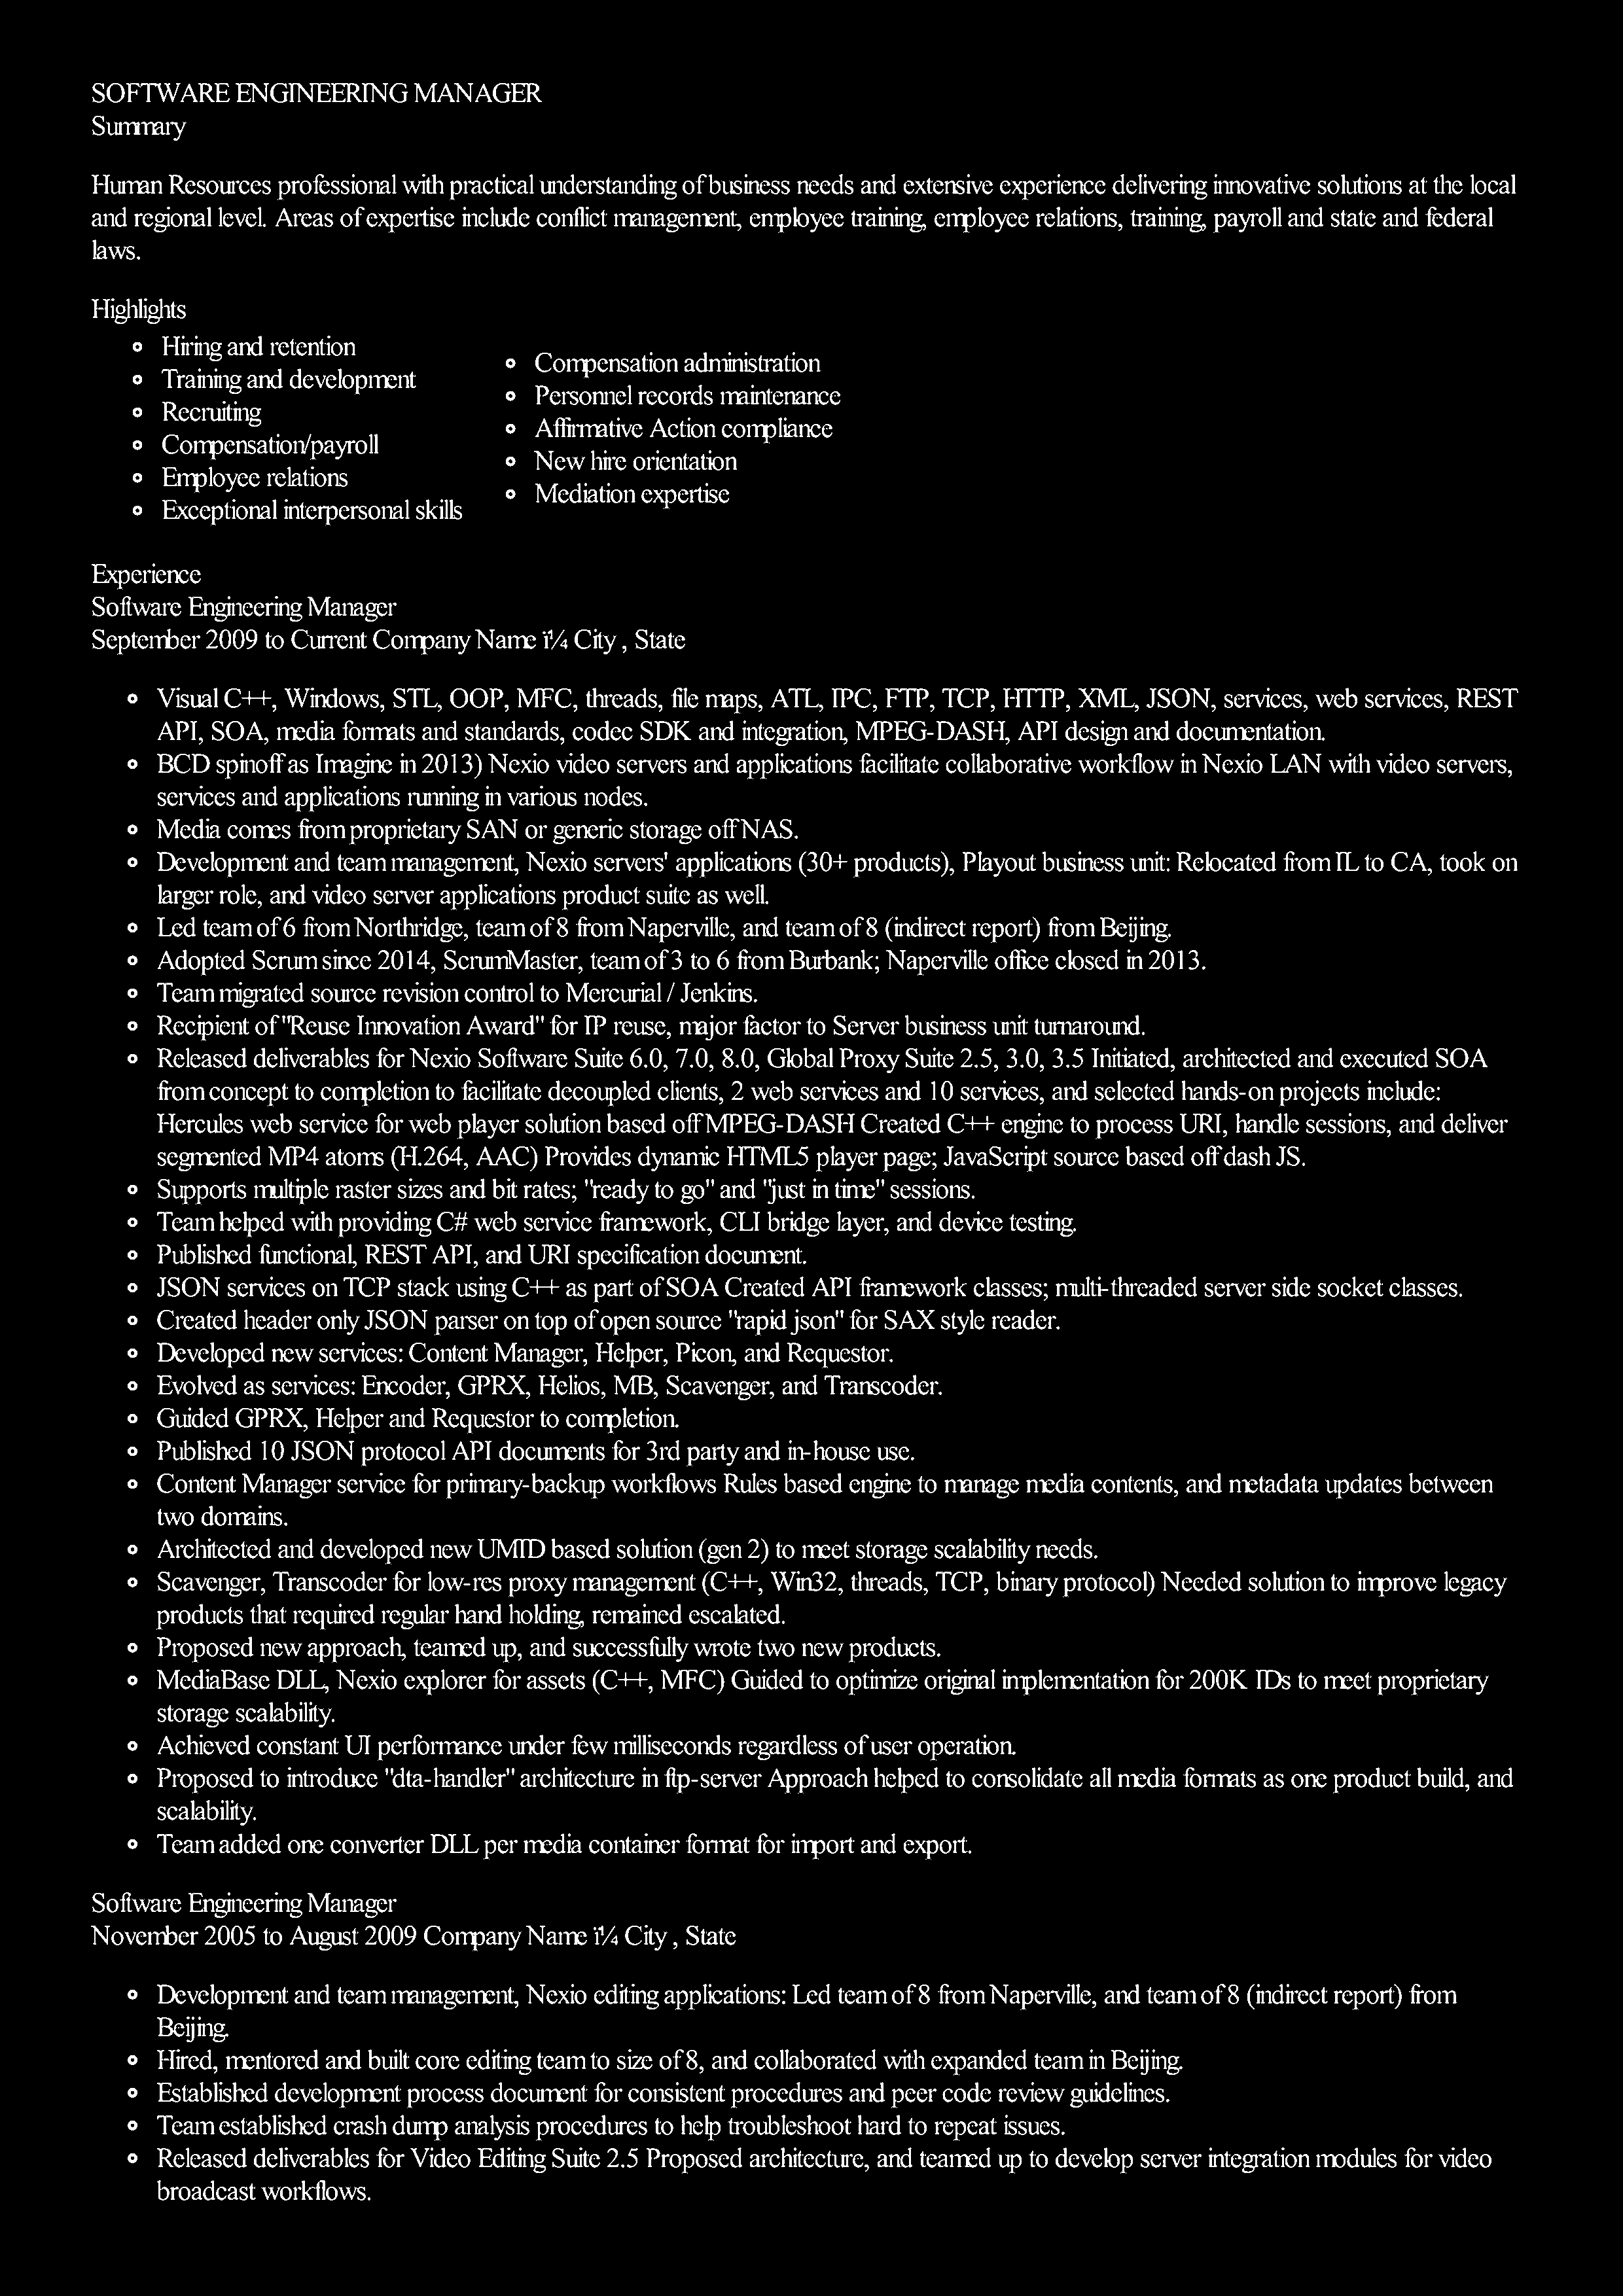

In [21]:
# Display the first binarized image from each converted PDF
from IPython.display import display, Image as DisplayImage

for pdf_file, image_paths in binarized_image_paths:
    if image_paths:
        print(f"Displaying first binarized page of {pdf_file}:")
        display(DisplayImage(image_paths[0]))
    else:
        print(f"No binarized images found for {pdf_file}")

## Check Skew

In [22]:
import math
from scipy.ndimage import rotate

def correct_skew(image_path):
    img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Invert the image if necessary (text should be white on black background for line detection)
    # This might be redundant depending on how binarization was done, but is safer.
    # Assuming text is white on black from previous binarization step (cv2.THRESH_BINARY_INV)
    # If text is black on white, use: img = cv2.bitwise_not(img)

    # Use Hough Line Transform to detect lines
    edges = cv2.Canny(img, 50, 150, apertureSize=3)
    lines = cv2.HoughLines(edges, 1, np.pi / 180, 200)

    if lines is None:
        print(f"No lines detected in {image_path}")
        return image_path # Return original path if no lines are detected

    # Calculate the angle of the lines
    angles = []
    for r, theta in lines[0]:
        angle = (theta * 180 / np.pi)
        # Angles close to 0 or 180 degrees are horizontal
        if 0 <= angle < 45:
            angles.append(angle)
        elif 135 <= angle <= 180:
            angles.append(angle - 180) # Map to -45 to 0 range

    if not angles:
        print(f"No horizontal or near-horizontal lines detected in {image_path}")
        return image_path

    # Calculate the median angle
    median_angle = np.median(angles)

    print(f"Detected skew angle for {image_path}: {median_angle} degrees")

    # Rotate the image to correct the skew
    # Use scipy.ndimage.rotate for better handling of image boundaries
    rotated_img = rotate(img, median_angle, reshape=False, order=0) # order=0 for nearest neighbor interpolation

    # Save the rotated image
    skew_corrected_img_path = image_path.replace("_binarized.png", "_skew_corrected.png")
    cv2.imwrite(skew_corrected_img_path, rotated_img)

    return skew_corrected_img_path

skew_corrected_image_paths = []

for pdf_file, binarized_image_paths_list in binarized_image_paths:
    pdf_skew_corrected_image_paths = []
    for binarized_img_path in binarized_image_paths_list:
        skew_corrected_img_path = correct_skew(binarized_img_path)
        pdf_skew_corrected_image_paths.append(skew_corrected_img_path)
    skew_corrected_image_paths.append((pdf_file, pdf_skew_corrected_image_paths))

print(f"Applied skew correction to {len(skew_corrected_image_paths)} PDFs. Sample images:", skew_corrected_image_paths[0][1][:3])

No horizontal or near-horizontal lines detected in /content/pdf_images/31677347_page_1_binarized.png
No horizontal or near-horizontal lines detected in /content/pdf_images/31677347_page_2_binarized.png
Applied skew correction to 1 PDFs. Sample images: ['/content/pdf_images/31677347_page_1_binarized.png', '/content/pdf_images/31677347_page_2_binarized.png']


## Text Extraction: Tesseract

In [23]:
!sudo apt update
!sudo apt install tesseract-ocr
!pip install pytesseract

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu jammy-cran40/ InRelease
Hit:2 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu2204/x86_64  InRelease
Hit:3 https://cli.github.com/packages stable InRelease
Hit:4 http://security.ubuntu.com/ubuntu jammy-security InRelease
Hit:5 https://r2u.stat.illinois.edu/ubuntu jammy InRelease
Hit:6 http://archive.ubuntu.com/ubuntu jammy InRelease
Hit:7 http://archive.ubuntu.com/ubuntu jammy-updates InRelease
Hit:8 https://ppa.launchpadcontent.net/deadsnakes/ppa/ubuntu jammy InRelease
Hit:9 http://archive.ubuntu.com/ubuntu jammy-backports InRelease
Hit:10 https://ppa.launchpadcontent.net/graphics-drivers/ppa/ubuntu jammy InRelease
Hit:11 https://ppa.launchpadcontent.net/ubuntugis/ppa/ubuntu jammy InRelease
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
41 packages can be upgraded. Run 'apt list --upgradable' to see them.
W: Skipping acquire of configured file 'main/source/Sources' as re

In [24]:
prompt = '''Extract the information from the given text extracted from a candidate CV and return a JSON object:
{{'name':'','email':'','phone':'','skills':'','education':'','experience':'','certifications':'','languages':''}}

Extraction rules:
name – full name of the candidate
email – valid email address
phone – phone number
skills – a list of technical and professional skills, only list the keys skills if have many skills, avoid listing duplicate skills, maximum skills listed is 15
education – including degree, institution name, and graduation year
experience – for each job: job title, company name, years worked, and a short and concise description
certifications – list of certifications, if available
languages – languages the candidate can speak or write

Mandatory requirements:
Ensure each record contains all 8 fields above
If field is missing, return value "N/A" for that field
Return a valid JSON format only, with no additional descriptions outside the JSON.

Below is the given text extracted:
PDF_TEXT
'''

In [25]:
from google.colab import userdata

genai.configure(api_key=userdata.get('API_Keys'))

In [26]:
import pytesseract

extracted_text_tesseract = []

for pdf_file, skew_corrected_image_paths_list in skew_corrected_image_paths[:1]:
    pdf_text = ""
    for img_path in skew_corrected_image_paths_list:
        try:
            text = pytesseract.image_to_string(Image.open(img_path), config='--psm 6')
            pdf_text += text + "\n"
        except Exception as e:
            print(f"Error extracting text from {img_path}: {e}")
            pdf_text += ""

    extracted_text_tesseract.append(pdf_text)

print(f"Extracted text using Tesseract from {len(extracted_text_tesseract)} PDF(s).")



Extracted text using Tesseract from 1 PDF(s).


In [28]:
import pytesseract

extracted_text_tesseract = []

# Take only the first PDF and the first page
pdf_file, skew_corrected_image_paths_list = skew_corrected_image_paths[0]
img_path = skew_corrected_image_paths_list[0]

pdf_text = ""
try:
    text = pytesseract.image_to_string(Image.open(img_path), config='--psm 6')
    pdf_text += text + "\n"
except Exception as e:
    print(f"Error extracting text from {img_path}: {e}")
    pdf_text += ""

extracted_text_tesseract.append(pdf_text)

print(f"Extracted text using Tesseract from the first page of {pdf_file}.")


all_results_tesseract = []
model = genai.GenerativeModel("gemini-2.0-flash-lite")

for pdf_text in tqdm(extracted_text_tesseract):
    try:
        result = model.generate_content(
            prompt.replace('PDF_TEXT', pdf_text)
        )
        time.sleep(5)  # Delay 5 seconds between each request to avoid rate limit
        all_results_tesseract.append(result.text)
    except Exception as e:
        print(f"Error processing text: {e}")
        all_results_tesseract.append(f"Error processing text: {e}") # Append error message for tracking


print("\nResults from Gemini model:")
for i, result in enumerate(all_results_tesseract):
    print(f"Result for PDF {i+1}:\n{result}\n")

Extracted text using Tesseract from the first page of 31677347.pdf.


100%|██████████| 1/1 [00:09<00:00,  9.53s/it]


Results from Gemini model:
Result for PDF 1:
```json
{
  "name": "N/A",
  "email": "N/A",
  "phone": "N/A",
  "skills": [
    "C++",
    "Windows",
    "STL",
    "OOP",
    "MFC",
    "Threads",
    "File Maps",
    "ATL",
    "IPC",
    "FTP",
    "TCP",
    "HTTP",
    "XML",
    "JSON",
    "Web Services"
  ],
  "education": "N/A",
  "experience": [
    {
      "job title": "Software Engineering Manager",
      "company name": "Company Name 1",
      "years worked": "September 2009 to Current",
      "description": "Managed development and teams for Nexio servers' applications. Architected and executed SOA. Developed and guided various services and solutions including web player solution, API framework, and new UMID based solution. Published JSON protocol API documents and led teams in multiple locations."
    },
    {
      "job title": "Software Engineering Manager",
      "company name": "Company Name 1",
      "years worked": "November 2005 to August 2009",
      "description"

## Summary

1. **Setup and Data Download**: We installed necessary libraries (PyMuPDF, pdfplumber, pdf2image, pytesseract) and downloaded a resume dataset from Kaggle.
2. **PDF to Image Conversion**: We converted the PDF files in the dataset to images using pdf2image. We also installed poppler-utils as a dependency for this step.
3. **Image Preprocessing**: We performed several image preprocessing steps to improve text extraction accuracy:
    
   a. Converted the images to grayscale.
   
   b. Applied a median filter for noise reduction.
    
   c. Binarized the images using adaptive thresholding.  
    
   d. Attempted to correct skew in the images (though no significant skew was detected in the sample).

 4. **Text Extraction (OCR)**: We used Tesseract OCR (pytesseract) to extract text from the processed images.

5. **Information Extraction using Gemini**: We used the Gemini model with a specific prompt to extract structured information (name, email, phone, skills, etc.) from the text extracted by Tesseract, in JSON format.